In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv('MH180 Hydraulics-day 2.csv')

In [4]:
df.head()

,Flow_rate,H_Flushing,H_Hammering,DP_Bit,Rig_equipment,S_Flushing,S_Hammering,Hammer_Power%,Min_WOB_(tons fce)
0,100,0,0,0,0,0,0,0.0,0.01
1,200,1,1,0,0,1,1,0.0,0.02
2,300,1,1,0,0,2,2,0.0,0.05
3,400,2,3,1,1,4,4,0.0,0.09
4,500,3,4,1,1,6,6,0.0,0.15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flow_rate           45 non-null     int64  
 1   H_Flushing          45 non-null     int64  
 2   H_Hammering         45 non-null     int64  
 3   DP_Bit              45 non-null     int64  
 4   Rig_equipment       45 non-null     int64  
 5   S_Flushing          45 non-null     int64  
 6   S_Hammering         45 non-null     int64  
 7   Hammer_Power%       45 non-null     float64
 8   Min_WOB_(tons fce)  45 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 3.3 KB


In [6]:
#Building a model 
#Null Hypothesis is DP Hammer (flushing) does not correlates stronglty with DP String Flusing
#Altenate Hypothesis DP Hammer (flushing) correlates stronglty with DP String Flusing
#Applying stats models

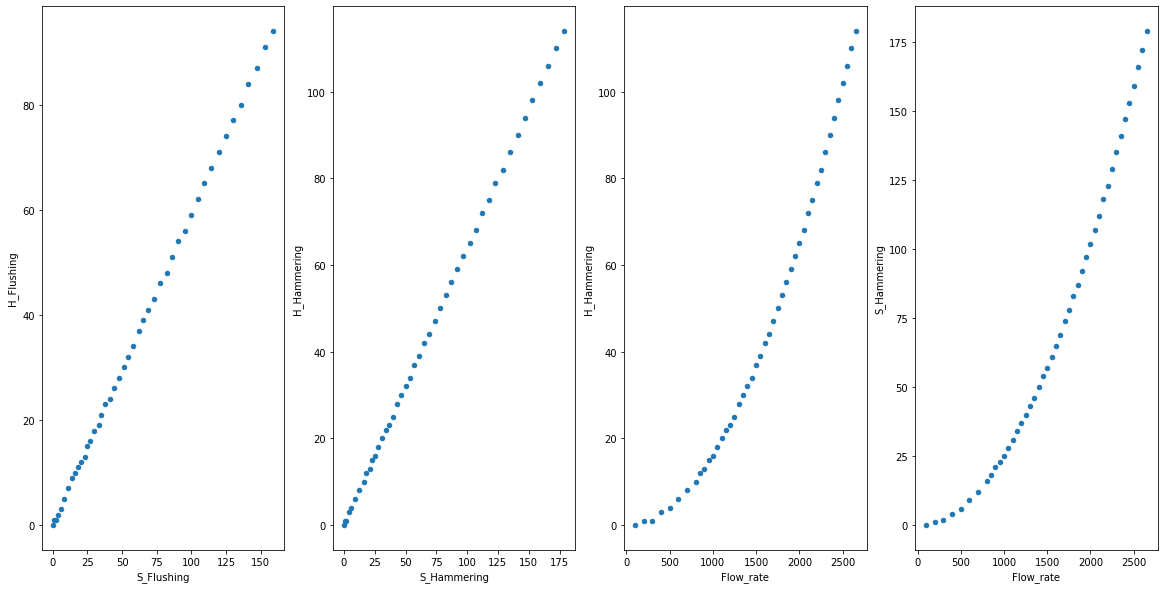

In [7]:
#First plotting the data
fig, axs=plt.subplots(1,4)
df.plot(kind='scatter', x='S_Flushing',y='H_Flushing', ax=axs[0], figsize=(20,10))
df.plot(kind='scatter', x='S_Hammering',y='H_Hammering', ax=axs[1], figsize=(20,10))
df.plot(kind='scatter', x='Flow_rate',y='H_Hammering', ax=axs[2], figsize=(20,10))
df.plot(kind='scatter', x='Flow_rate',y='S_Hammering', ax=axs[3], figsize=(20,10))

In [8]:
import numpy as np
print('Corr b/w DP of Hammer Flushing and String Flushing :',np.corrcoef(df.H_Flushing,df.S_Flushing)[0])
print("\n")
print('Corr b/w DP of Hammer Hammering and String Hamerring :',np.corrcoef(df.H_Hammering,df.S_Hammering)[0])
print("\n")
print('Corr b/w Flow rate and Hammer Hamerring :',np.corrcoef(df.Flow_rate,df.S_Hammering)[0])
print("\n")

Corr b/w DP of Hammer Flushing and String Flushing : [1.         0.99991453]


Corr b/w DP of Hammer Hammering and String Hamerring : [1.         0.99995278]


Corr b/w Flow rate and Hammer Hamerring : [1.         0.97179276]




In [9]:
#Using Stats Model to understand the hypothesis: Model 1
import statsmodels.formula.api as smf
model1=smf.ols(formula='Flow_rate ~ S_Flushing', data=df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Flow_rate   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     720.2
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.73e-28
Time:                        09:15:04   Log-Likelihood:                -293.97
No. Observations:                  45   AIC:                             591.9
Df Residuals:                      43   BIC:                             595.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    605.0325     42.457     14.250      0.000     519.410     690.655
S_Flushing    14.4547      0.539     26.836      0.000      13.368      15.541
==============================================================================
Omnibus:                       12.124   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.283
Skew:                          -1.217   Prob(JB):                      0.00215
Kurtosis:                       3.794   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Flow_rate ~ S_Hammering', data=df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Flow_rate   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     730.1
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.31e-28
Time:                        09:15:39   Log-Likelihood:                -293.68
No. Observations:                  45   AIC:                             591.4
Df Residuals:                      43   BIC:                             595.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     605.3215     42.164     14.356      0.000     520.290     690.353
S_Hammering    12.8230      0.475     27.021      0.000      11.866      13.780
==============================================================================
Omnibus:                       12.316   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.515
Skew:                          -1.222   Prob(JB):                      0.00192
Kurtosis:                       3.840   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""